<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

# The Geo Dataframe

The geodata frame is an extended data frame where every row represents spatial elements (points, lines, polygons).

Let's practice following these steps:

1. Create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to this [website](https://www.efrainmaps.es/english-version/free-downloads/world/).
5. Download three map files into the folder **maps** in your computer: countries, cities, and rivers.

You may see something like this:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/introgeodf/blob/main/pics_for_notebook/mapsFolderImage.png?raw=true">



You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/introgeodf/blob/main/pics_for_notebook/folderRar_1.png?raw=true">


Now, take a look a **World_Countries**, which is a **shapefile**, the most common file type that stores spatial elements: 


<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/introgeodf/blob/main/pics_for_notebook/imageCountries_shp.png?raw=true">


There, you see that this **one map** requires **several files**. That is the nature of the shapefile. 

Let's read the file with the help of **geopandas**:

In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [12]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


Let's use some familiar code:

In [13]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

countries is a GeoDF, opened using GEOpandas, so most common Pandas functions will work:

In [14]:
# dimensions
countries.shape

(252, 2)

In [15]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [16]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [11]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [17]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


## Basic Plotting

The presence of the **geometry** column facilitates plotting:

<Axes: >

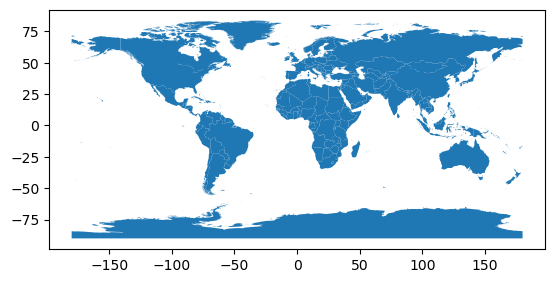

In [24]:
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# plot simple

countries.plot()
#countries.geom_type()

Let's open the other maps:

In [21]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

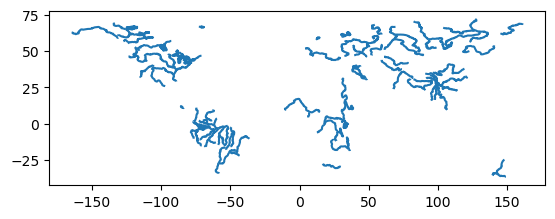

In [25]:
# visualizing rivers
rivers.plot()

<Axes: >

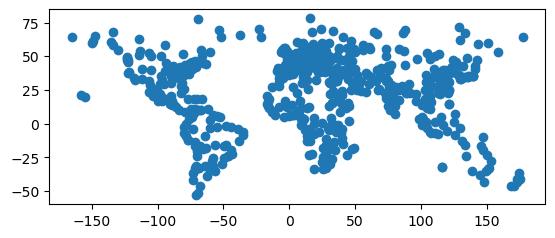

In [26]:
# visualizing cities
cities.plot()

### Visual adjustments

In general you need to adjust:
* color of the polygon/line/point (see [here](https://matplotlib.org/stable/gallery/color/named_colors.html))
* thickness of lines,
* line style (see [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html))
* size of points, 
* point style (see [here](https://matplotlib.org/stable/api/markers_api.html))
* and the transparency level (you can find a list of colors ) . Let's see:

<Axes: >

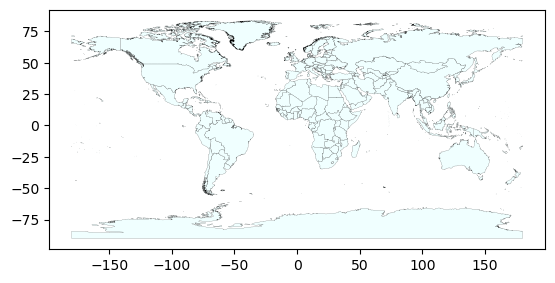

In [31]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

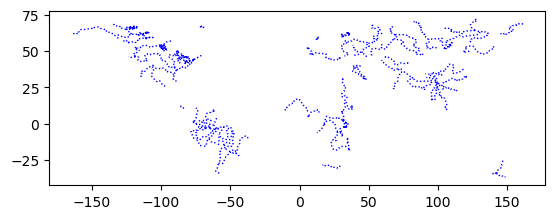

In [32]:
rivers.plot(edgecolor='blue', 
            linewidth=1,
            linestyle='dotted')

<Axes: >

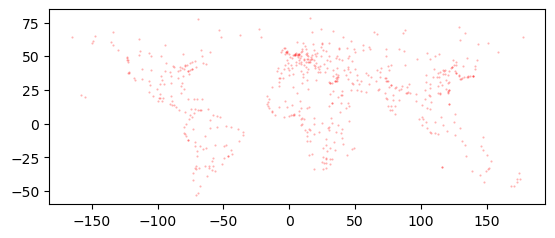

In [33]:
cities.plot(marker='.', # marker type
            color='red', 
            markersize=1,
            alpha=0.3) # transparency

### Plotting Multiple layers of maps

This requires to plot a map **on top** of the other (order matters). 

It is a simple process, but the first step is verify that all have the same projection (**CRS**):

In [34]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

They all have the same crs, but if they did not, you have to use **to_crs()**:

In [37]:
# changing crs in cities and rivers to be the same as countries

cities=cities.to_crs(countries.crs)
rivers=rivers.to_crs(countries.crs)

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

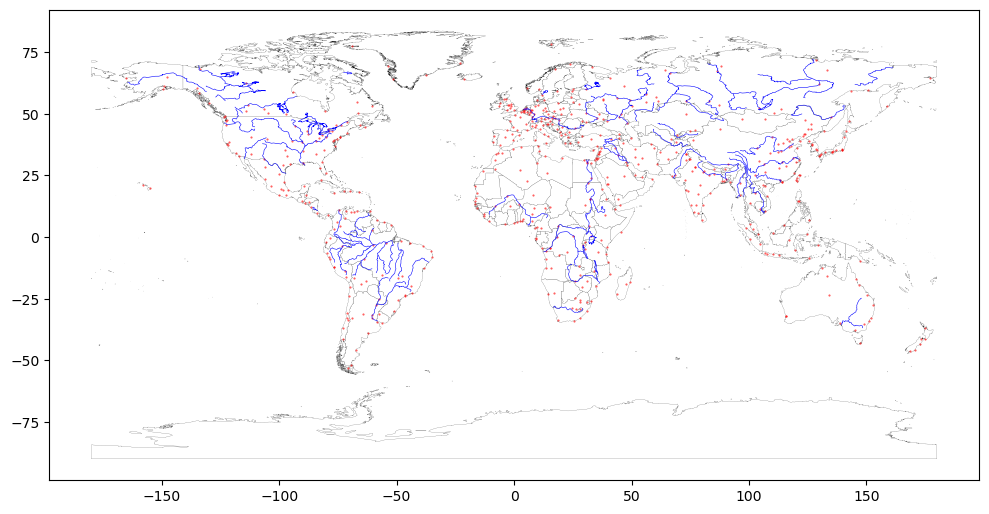

In [38]:
base = countries.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of..
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of..

A nice feature would be to represent the map in an interactive way:

In [39]:
import folium


m = cities.explore(color="red", 
                   name="cities")#optional

m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
#folium.LayerControl().add_to(m) #optional
m

ModuleNotFoundError: No module named 'folium'

##  Subsetting and Clipping

You can subset your map as you did in classic data frames:

In [43]:
brazil=countries[countries.COUNTRY=='Brazil']

Now, you can plot this *sub* map:

<Axes: >

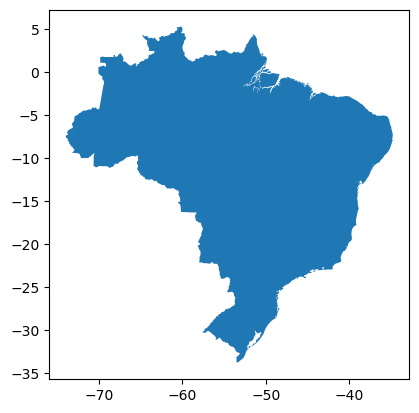

In [44]:
brazil.plot()

Now, see the details on  the cities:

In [45]:
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


You can keep the Brazilian cities following the same previous process:

<Axes: >

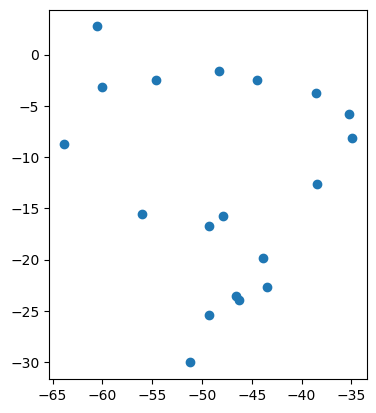

In [46]:
cities_brazil=cities[cities.COUNTRY=='Brazil']

# and of course
cities_brazil.plot()

But, see the rivers:

In [47]:
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


In the case of rivers, you do not see contry information, as you do in the two previous GeoDFs. But we could use the fact that the rivers are inside Brazil, then we can use **clipping**:

Then you can keep the **parts** of the other maps that intersect with the sub-polygon:

<Axes: >

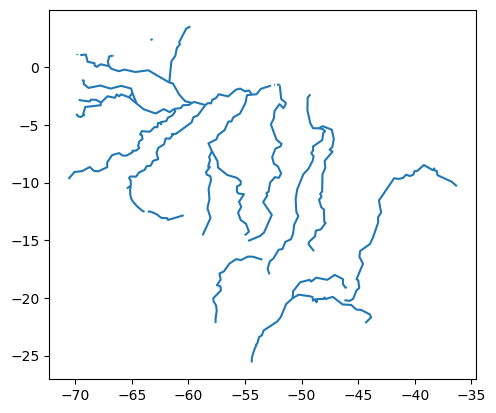

In [48]:
rivers_brazil = gpd.clip(gdf=rivers,
                               mask=brazil)

# you have:

rivers_brazil.plot()

Then, you can plot the clipped version:

<Axes: >

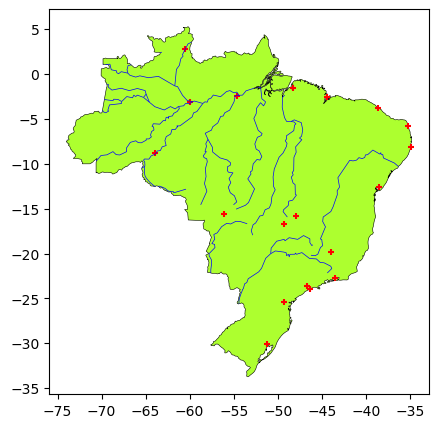

In [49]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_brazil.plot(marker='+', color='red', markersize=15,ax=base)
rivers_brazil.plot(edgecolor='blue', linewidth=0.5,ax=base)

The interactive alternative for this last case could require to set the **folium** map to a particular coordinate. Let's finde the one for Brazil here: [https://www.geodatos.net/en/coordinates](https://www.geodatos.net/en/coordinates):

In [51]:
brazilCoord=[-14.235004, -51.92528]
#Coordenada para ubicar un punto donde centrar Brazil en el mapa (para que haga zoom por Brazil, cuando se haga el mapa interactivo)

In [52]:
m = cities_brazil.explore(location=brazilCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_brazil.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

## (Re) Projecting  

As mentioned in class, the CRS is a very important property of the maps. They affect three aspects:

* shape
* area
* scale
* direction

The most used CRS is 4326, but it is **not projected**:

In [53]:
# unit is in degrees:
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Some operations will **warn** you on this issue:

In [54]:
# centroid
brazil.centroid

C:\Users\Patiy Li Yang\AppData\Local\Temp\ipykernel_21616\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

A projected CRS will have units in meters or feet (or similar). You can find a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [55]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [56]:
# this works with no warning
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

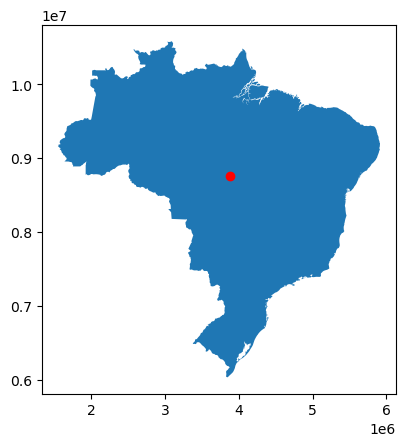

In [57]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

Not using the right projection will give you a wrong numerical result when needing numerical accuracy; however, you might find situation where the visual output seems right (yet it is wrong). Then, Let's keep the projected version for all our maps:

In [58]:
brazil_5641=brazil.to_crs(5641)
# just Brazil

cities_brazil=cities[cities.COUNTRY=='Brazil']
cities_5641=cities_brazil.to_crs(brazil_5641.crs)

rivers_5641=rivers.to_crs(brazil_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=brazil_5641)

The plot again:

In [ ]:
base = brazil_5641.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_5641.plot(marker='+', color='red', markersize=15,ax=base)
rivers_5641.plot(edgecolor='blue', linewidth=0.5,ax=base)

## Exporting maps

You may need a couple of things here:

- Save the map as an image.
- Save the files (not the images).

Let's see:

In [ ]:
# save the map as image
import matplotlib.pyplot as plt

base = brazil_5641.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_5641.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_5641.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapEnd.jpg'))

We have not changed the initial map, but we could export the maps into a different file type (not shapefiles):

In [ ]:
# Convertir a GeoPackage, no shapefile
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

The most important thing, now that you have saved these several maps into one file is that, once in GitHub, you can call the map with the url link...


<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/introgeodf/blob/main/pics_for_notebook/getLinkGit.png?raw=true">


Let me save the link recovered:

In [ ]:
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

You can ask what layers are present:

In [ ]:
from  fiona import listlayers

listlayers(worldMaps)

Now you are confident what to request:

In [ ]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

As you see, it works great:

In [ ]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)

Of course, we can save what we did for Brazil:

In [ ]:
# saving 
import os

brazil_5641.to_file(os.path.join("maps","brazil_5641","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_5641.to_file(os.path.join("maps","brazil_5641","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_5641.to_file(os.path.join("maps","brazil_5641","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

Exercise:

1. Create a repo: **simpleplot**
2. Clone that repo to your computer.
3. Put the same **rar** files we used at the begining (countries, cities, rivers).
4. Keep the maps for one country.
5. Find the right CRS for the country, and make sure the other maps share the same one.
6. Plot the projected maps like this:
   
   7.1 Each one independently.
   
   7.2 All together
   
   7.3 All together interactively
8. Save the NON interactive map (6.2) as an image.
9. Save the three reprojected maps  into one geopackage file.
10. Get the link for the geopackage and make sure it is working well.